In [ ]:
pip install rasterio

In [ ]:
! pip install matplotlib

In [22]:
import rasterio 
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
! pip install os 

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [27]:
import os
os.listdir("D:\College files\TISS\Data\Sentinal.tif")

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\HP\AppData\Local\Temp\ipykernel_28376\1214490915.py:2: SyntaxWarning: invalid escape sequence '\C'
  os.listdir("D:\College files\TISS\Data\Sentinal.tif")
C:\Users\HP\AppData\Local\Temp\ipykernel_28376\1214490915.py:2: SyntaxWarning: invalid escape sequence '\C'
  os.listdir("D:\College files\TISS\Data\Sentinal.tif")


NotADirectoryError: [WinError 267] The directory name is invalid: 'D:\\College files\\TISS\\Data\\Sentinal.tif'

In [28]:
band4 = rasterio.open('D:\College files\TISS\Data\Sentinal.tif') #red
band8 = rasterio.open('D:\College files\TISS\Data\Sentinal.tif') #nir

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\HP\AppData\Local\Temp\ipykernel_28376\4151681866.py:1: SyntaxWarning: invalid escape sequence '\C'
  band4 = rasterio.open('D:\College files\TISS\Data\Sentinal.tif') #red
C:\Users\HP\AppData\Local\Temp\ipykernel_28376\4151681866.py:2: SyntaxWarning: invalid escape sequence '\C'
  band8 = rasterio.open('D:\College files\TISS\Data\Sentinal.tif') #nir


In [36]:
height = band4.height
print(f"Height: {height}")

Height: 846


In [38]:
shape = band8.shape
print(f"Shape: {shape}")

Shape: (846, 1262)


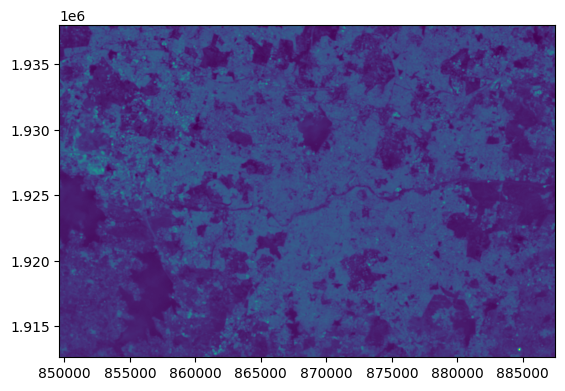

<Axes: >

In [30]:
plot.show(band4)

In [31]:
band4.dtypes[0]

'int16'

In [39]:
band4.crs

CRS.from_epsg(32643)

In [40]:
band4.transform

Affine(30.0, 0.0, 849630.0,
       0.0, -30.0, 1938030.0)

In [41]:
band4.read()

array([[[ 317,  309,  309, ...,  452,  452,  462],
        [ 317,  351,  351, ...,  431,  431,  459],
        [ 317,  351,  351, ...,  431,  431,  459],
        ...,
        [ 712,  767,  767, ...,  405,  405,  474],
        [ 712,  767,  767, ...,  405,  405,  474],
        [ 723,  799,  799, ...,  455,  455,  477]],

       [[ 303,  297,  294, ...,  316,  387,  505],
        [ 335,  355,  495, ...,  415,  339,  455],
        [ 672,  576,  394, ...,  420,  384,  409],
        ...,
        [ 775,  775,  788, ...,  483,  475,  700],
        [ 854,  815,  968, ...,  449,  450,  456],
        [ 780,  888,  854, ...,  468,  554,  635]],

       [[ 500,  465,  527, ...,  620,  678,  764],
        [ 564,  589,  738, ...,  727,  625,  746],
        [ 925,  825,  690, ...,  699,  732,  733],
        ...,
        [1099, 1172, 1170, ...,  741,  786,  973],
        [1177, 1126, 1365, ...,  686,  734,  677],
        [1102, 1255, 1252, ...,  722,  819,  861]],

       ...,

       [[   0,    0,    

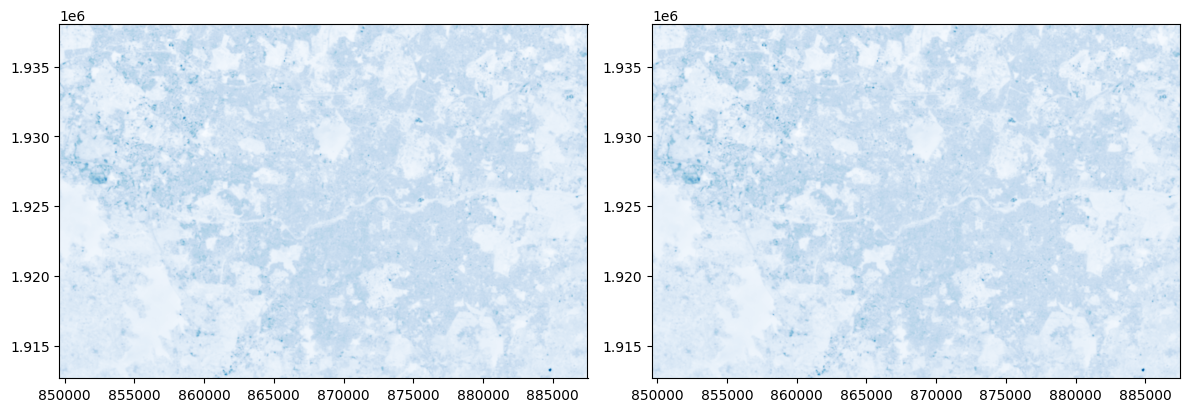

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band8, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [45]:
red = band4.read(1).astype('float64')
nir = band8.read(1).astype('float64')

In [46]:
nir

array([[317., 309., 309., ..., 452., 452., 462.],
       [317., 351., 351., ..., 431., 431., 459.],
       [317., 351., 351., ..., 431., 431., 459.],
       ...,
       [712., 767., 767., ..., 405., 405., 474.],
       [712., 767., 767., ..., 405., 405., 474.],
       [723., 799., 799., ..., 455., 455., 477.]])

In [51]:
ndvi=np.where( 
    (nir+red) == 0., 
    0, 
    (nir-red)/(nir+red))

In [52]:
ndvi

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
ndviImage = rasterio.open('D:\College files\TISS\Sentinal.tif', 'w', driver='Gtiff', 
width=band4.width, height=band4.height, 
count=1, crs=band4.crs, transform=band4.transform, 
dtype='float64')

ndviImage.write(ndvi,1)
ndviImage.close()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\HP\AppData\Local\Temp\ipykernel_28376\2507174008.py:1: SyntaxWarning: invalid escape sequence '\C'
  ndviImage = rasterio.open('D:\College files\TISS\Sentinal.tif', 'w', driver='Gtiff',


In [58]:
ndvi = rasterio.open('D:\College files\TISS\Sentinal.tif')

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\HP\AppData\Local\Temp\ipykernel_28376\3714231987.py:1: SyntaxWarning: invalid escape sequence '\C'
  ndvi = rasterio.open('D:\College files\TISS\Sentinal.tif')


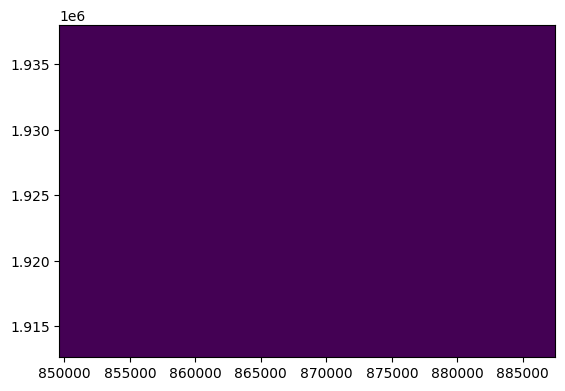

<Axes: >

In [59]:
plot.show(ndvi)